# HR Analytics Challenge¶


A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well.

Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.

To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [43]:
train = pd.read_csv("/kaggle/input/train.csv")
test = pd.read_csv("/kaggle/input/test.csv")

test_enrollee_id = test['enrollee_id']
n_train = train.shape[0]
n_test = test.shape[0]

data = pd.concat([train,test])
del data['enrollee_id']

print(data.shape)
print(n_train)
print(n_test)

(33380, 13)
18359
15021


In [44]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0
2,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0
4,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    33380 non-null  object 
 1   city_development_index  33380 non-null  float64
 2   gender                  25894 non-null  object 
 3   relevent_experience     33380 non-null  object 
 4   enrolled_university     32759 non-null  object 
 5   education_level         32528 non-null  object 
 6   major_discipline        28149 non-null  object 
 7   experience              33277 non-null  object 
 8   company_size            24550 non-null  object 
 9   company_type            24011 non-null  object 
 10  last_new_job            32709 non-null  object 
 11  training_hours          33380 non-null  int64  
 12  target                  18359 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.6+ MB


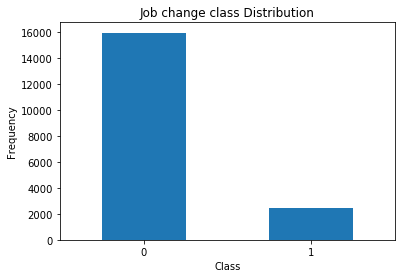

In [46]:
count_classes = pd.value_counts(train['target'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Job change class Distribution')
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Data preprocessing

In [47]:
NoJobChange = len(train[train.target == 0])
JobChange = len(train[train.target == 1])
print("No. of Employees not looking for job change: {}".format(NoJobChange))
print("No. of Employees looking for job change: {}".format(JobChange))
print("Percentage of Employees not looking for job change: {:.2f}%".format((NoJobChange / (len(train.target))*100)))
print("Percentage of Employees looking for job change: {:.2f}%".format((JobChange / (len(train.target))*100)))

No. of Employees not looking for job change: 15934
No. of Employees looking for job change: 2425
Percentage of Employees not looking for job change: 86.79%
Percentage of Employees looking for job change: 13.21%


In [48]:
data.isnull().sum()

city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [49]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
city,0.000000
city_development_index,0.000000
gender,22.426603
relevent_experience,0.000000
enrolled_university,1.860395
education_level,2.552427
major_discipline,15.671061
experience,0.308568
company_size,26.452966
company_type,28.067705


In [50]:
#Ratios in dataset


#gender
print("Gender\n")
male = len(data[data.gender == "Male"])
female = len(data[data.gender == "Female"])
other = len(data[data.gender == "Other"])

print("Ratio of Male: {}".format(male / 25894))
print("Ratio of Female: {}".format(female / 25894))
print("Ratio of Other: {}".format(other / 25894))

print("-"*50)

#major_discipline
print("Major discipline\n")
STEM = len(data[data.major_discipline == "STEM"])
Other = len(data[data.major_discipline == "Other"])
No_Major = len(data[data.major_discipline == "No Major"])
Business_Degree = len(data[data.major_discipline == "Business Degree"])
Arts = len(data[data.major_discipline == "Arts"])
Humanities = len(data[data.major_discipline == "Humanities"])


print("Ratio of STEM: {}".format(STEM / 28149))
print("Ratio of Other: {}".format(Other / 28149))
print("Ratio of No Major: {}".format(No_Major / 28149))
print("Ratio of Business Degree: {}".format(Business_Degree / 28149))
print("Ratio of Arts: {}".format(Arts / 28149))
print("Ratio of Humanities: {}".format(Humanities / 28149))


print("-"*50)


#company_size
print("Company size\n")
_100to500 = len(data[data.company_size == "100-500"])
_less10 = len(data[data.company_size == "<10"])
_50to99 = len(data[data.company_size == "50-99"])
_5000to9999 = len(data[data.company_size == "5000-9999"])
_10000plus = len(data[data.company_size == "10000+"])
_1000to4999 = len(data[data.company_size == "1000-4999"])
_10to49 = len(data[data.company_size == "10/49"])
_500to999 = len(data[data.company_size == "500-999"])

print("Ratio of 100-500: {}".format(_100to500 / 24550))
print("Ratio of <10: {}".format(_less10 / 24550))
print("Ratio of 50-99: {}".format(_50to99 / 24550))
print("Ratio of 5000-9999: {}".format(_5000to9999 / 24550))
print("Ratio of 10000+: {}".format(_10000plus / 24550))
print("Ratio of 1000-4999: {}".format(_1000to4999 / 24550))
print("Ratio of 10/49: {}".format(_10to49 / 24550))
print("Ratio of 500-999: {}".format(_500to999 / 24550))



print("-"*50)


#company_type
print("Company type\n")
Pvt_Ltd = len(data[data.company_type == "Pvt Ltd"])
Funded_Startup = len(data[data.company_type == "Funded Startup"])
Public_Sector = len(data[data.company_type == "Public Sector"])
Early_Stage_Startup = len(data[data.company_type == "Early Stage Startup"])
NGO = len(data[data.company_type == "NGO"])
Other = len(data[data.company_type == "Other"])


print("Ratio of Pvt Ltd: {}".format(Pvt_Ltd / 24011))
print("Ratio of Funded Startup: {}".format(Funded_Startup / 24011))
print("Ratio of Public Sector: {}".format(Public_Sector / 24011))
print("Ratio of Early Stage Startup: {}".format(Early_Stage_Startup / 24011))
print("Ratio of NGO: {}".format(NGO / 24011))
print("Ratio of Other: {}".format(Other / 24011))


print("-"*50)

Gender

Ratio of Male: 0.9060786282536495
Ratio of Female: 0.0805205839190546
Ratio of Other: 0.0134007878272959
--------------------------------------------------
Major discipline

Ratio of STEM: 0.8829798571885324
Ratio of Other: 0.02408611318341682
Ratio of No Major: 0.013748268144516679
Ratio of Business Degree: 0.020782265799850794
Ratio of Arts: 0.015346903975274433
Ratio of Humanities: 0.04305659170840882
--------------------------------------------------
Company size

Ratio of 100-500: 0.19735234215885947
Ratio of <10: 0.10036659877800408
Ratio of 50-99: 0.23205702647657842
Ratio of 5000-9999: 0.04325865580448065
Ratio of 10000+: 0.14932790224032585
Ratio of 1000-4999: 0.10236252545824848
Ratio of 10/49: 0.1085132382892057
Ratio of 500-999: 0.06676171079429735
--------------------------------------------------
Company type

Ratio of Pvt Ltd: 0.7544042313939444
Ratio of Funded Startup: 0.07829744700345675
Ratio of Public Sector: 0.07463246012244389
Ratio of Early Stage Startup: 

In [51]:
#Filling null values

# gender
data['gender'] = data['gender'].fillna(pd.Series(np.random.choice(['Male', 'Female', 'Other'], 
                                                                    p=[0.90, 0.08, 0.02], size=len(data))))

#enrolled_university
data['enrolled_university'] = data['enrolled_university'].fillna((data['enrolled_university'].mode()[0]))

#education_level
data['education_level'] = data['education_level'].fillna((data['education_level'].mode()[0]))


#major_discipline
data['major_discipline'] = data['major_discipline'].fillna(pd.Series(np.random.choice(['STEM', 'Other', 'No Major', 
'Business Degree', 'Arts', 'Humanities'], p=[0.88, 0.02, 0.01, 0.02, 0.02, 0.05], size=len(data))))


#experience
data['experience'] = data['experience'].fillna((data['experience'].mode()[0]))


#company_size
data['company_size'] = data['company_size'].fillna(pd.Series(np.random.choice(['100-500', '<10', '50-99',
'5000-9999', '10000+', '1000-4999', '10/49', '500-999' ], p=[0.2, 0.1, 0.24, 0.04, 0.15, 0.10, 0.1, 0.07],
                                                                                size=len(data))))
#company_type
data['company_type'] = data['company_type'].fillna(pd.Series(np.random.choice(['Pvt Ltd', 'Funded Startup',
'Public Sector', 'Early Stage Startup', 'NGO', 'Other' ], p=[0.76, 0.08, 0.07, 0.04, 0.04, 0.01 ], size=len(data))))

#last_new_job
data['last_new_job'] = data['last_new_job'].fillna((data['last_new_job'].mode()[0]))


In [52]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['relevent_experience'] = labelencoder.fit_transform(data['relevent_experience'])

data['enrolled_university'] = labelencoder.fit_transform(data['enrolled_university'])

data['education_level'] = labelencoder.fit_transform(data['education_level'])

data['city'] = labelencoder.fit_transform(data['city'])


In [53]:
print(data.last_new_job.unique())
print(data.experience.unique())

['1' '2' '3' '>4' 'never' '4']
['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' '20']


In [54]:
data.experience = data.experience.replace(">20", 21)
data.experience = data.experience.replace("<1", 0)

data.last_new_job = data.last_new_job.replace(">4", 5)
data.last_new_job = data.last_new_job.replace("never", 0)

data['experience'] = data['experience'].astype(str).astype(int)
data['last_new_job'] = data['last_new_job'].astype(str).astype(int)

data['training_hours'] = np.log(data['training_hours'])

In [55]:
#Since 'gender', 'major_discipline', 'company_size', 'company_type'  are categorical variables we'll turn them into dummy variables.

a = pd.get_dummies(data['gender'], prefix = "gender")
b = pd.get_dummies(data['major_discipline'], prefix = "major_discipline")
c = pd.get_dummies(data['company_size'], prefix = "company_size")
d = pd.get_dummies(data['company_type'], prefix = "company_type")


frames = [data, a, b, c, d]
data = pd.concat(frames, axis = 1)

data = data.drop(columns = ['gender', 'major_discipline', 'company_size', 'company_type' ])

In [56]:
cols_data = list(data.columns.values)
cols_data

['city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'last_new_job',
 'training_hours',
 'target',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'major_discipline_Arts',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_size_10/49',
 'company_size_100-500',
 'company_size_1000-4999',
 'company_size_10000+',
 'company_size_50-99',
 'company_size_500-999',
 'company_size_5000-9999',
 'company_size_<10',
 'company_type_Early Stage Startup',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd']

In [57]:
#Rearrange column order

data = data[['city',
 'city_development_index',
 'education_level',
 'enrolled_university',
 'experience',
 'last_new_job',
 'relevent_experience',
 'training_hours',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'major_discipline_Arts',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_size_10/49',
 'company_size_100-500',
 'company_size_1000-4999',
 'company_size_10000+',
 'company_size_50-99',
 'company_size_500-999',
 'company_size_5000-9999',
 'company_size_<10',
 'company_type_Early Stage Startup',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd',
 'target'
]]

In [58]:
data.head()

,city,city_development_index,education_level,enrolled_university,experience,last_new_job,relevent_experience,training_hours,gender_Female,gender_Male,...,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
0,41,0.689,0,2,3,1,0,4.663439,0,1,...,0,0,0,0,0,0,0,0,1,0.0
1,112,0.923,0,2,14,1,0,4.234107,0,1,...,0,0,1,0,1,0,0,0,0,0.0
2,48,0.910,0,2,6,2,0,1.386294,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,93,0.666,0,2,14,1,0,3.258097,0,1,...,0,0,0,0,0,0,0,0,1,0.0
4,2,0.887,2,2,8,2,1,4.477337,0,1,...,0,0,0,0,0,0,0,0,1,1.0


### column addition (clustering)

In [59]:
X_cluster = data.iloc[:, 0:-1].values

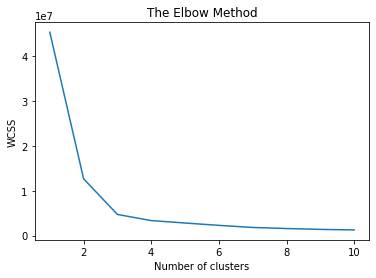

In [60]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster = kmeans.fit_predict(X_cluster)

In [62]:
#train
data['cluster']= cluster
data.head()

,city,city_development_index,education_level,enrolled_university,experience,last_new_job,relevent_experience,training_hours,gender_Female,gender_Male,...,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target,cluster
0,41,0.689,0,2,3,1,0,4.663439,0,1,...,0,0,0,0,0,0,0,1,0.0,0
1,112,0.923,0,2,14,1,0,4.234107,0,1,...,0,1,0,1,0,0,0,0,0.0,2
2,48,0.910,0,2,6,2,0,1.386294,0,0,...,0,0,0,0,0,0,1,0,0.0,0
3,93,0.666,0,2,14,1,0,3.258097,0,1,...,0,0,0,0,0,0,0,1,0.0,2
4,2,0.887,2,2,8,2,1,4.477337,0,1,...,0,0,0,0,0,0,0,1,1.0,1


In [63]:
train_data = data.iloc[:n_train]
test_data = data.iloc[n_train:]

del test_data['target']

print(train_data.shape)
print(test_data.shape)

(18359, 33)
(15021, 32)


In [64]:
y_train = train_data['target']
del train_data['target']
x_train = train_data

x_test = test_data

## Algorithms

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, chi2

In [66]:
model = ExtraTreeClassifier()
model.fit(x_train,y_train)
feature_imp = pd.DataFrame({'Feature' : x_train.columns, 'Score' : model.feature_importances_})
feature_imp.sort_values(by=['Score'], ascending=False)

,Feature,Score
7,training_hours,0.252282
4,experience,0.183098
5,last_new_job,0.106930
1,city_development_index,0.089254
0,city,0.080738
2,education_level,0.053069
3,enrolled_university,0.046111
6,relevent_experience,0.021392
30,company_type_Pvt Ltd,0.016532
29,company_type_Public Sector,0.013798


In [67]:
# Initialise the Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)

In [68]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: 0.5760951424626585, 1: 3.785360824742268}


In [69]:
dt = DecisionTreeClassifier(class_weight=class_weights_dict)

scores = cross_validate(dt, x_train, y_train, cv=2, scoring=make_scorer(roc_auc_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.51849597 0.51949088]
0.5189934232950608


In [70]:
rf = RandomForestClassifier(n_estimators=200, class_weight=class_weights_dict)

scores = cross_validate(rf, x_train, y_train, cv=2, scoring=make_scorer(roc_auc_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.50636979 0.50601916]
0.5061944750569132


In [71]:
gb = GradientBoostingClassifier(n_estimators=200)

scores = cross_validate(gb, x_train, y_train, cv=2, scoring=make_scorer(roc_auc_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.50293813 0.5004042 ]
0.5016711670749545


In [72]:
lr = LogisticRegression(random_state=0, class_weight=class_weights_dict)

scores = cross_validate(lr, x_train, y_train, cv=2, scoring=make_scorer(roc_auc_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.59772013 0.59452476]
0.5961224469110772


In [73]:
clf = lr

In [74]:
clf.fit(x_train, y_train)

LogisticRegression(C=1.0,
                   class_weight={0: 0.5760951424626585, 1: 3.785360824742268},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

## Predicting final result of test set

In [75]:
result = pd.DataFrame(data=test['enrollee_id'])
result.head()

,enrollee_id
0,16548
1,12036
2,11061
3,5032
4,17599


In [76]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [77]:
test = test.drop(['enrollee_id'], axis=1)

In [78]:
x_test = scaler.transform(x_test)
pred = clf.predict(x_test)
print(pred)

[1. 0. 1. ... 0. 1. 1.]


In [79]:
test.shape

(15021, 12)

In [80]:
pred.shape

(15021,)

In [81]:
#Column addition

result['target']= pred
result.head(25)

,enrollee_id,target
0,16548,1.0
1,12036,0.0
2,11061,1.0
3,5032,0.0
4,17599,0.0
5,19314,0.0
6,12365,1.0
7,22696,0.0
8,16083,0.0
9,33240,1.0


## Exporting result to csv

In [82]:
result.to_csv("prediction.csv", index=False)